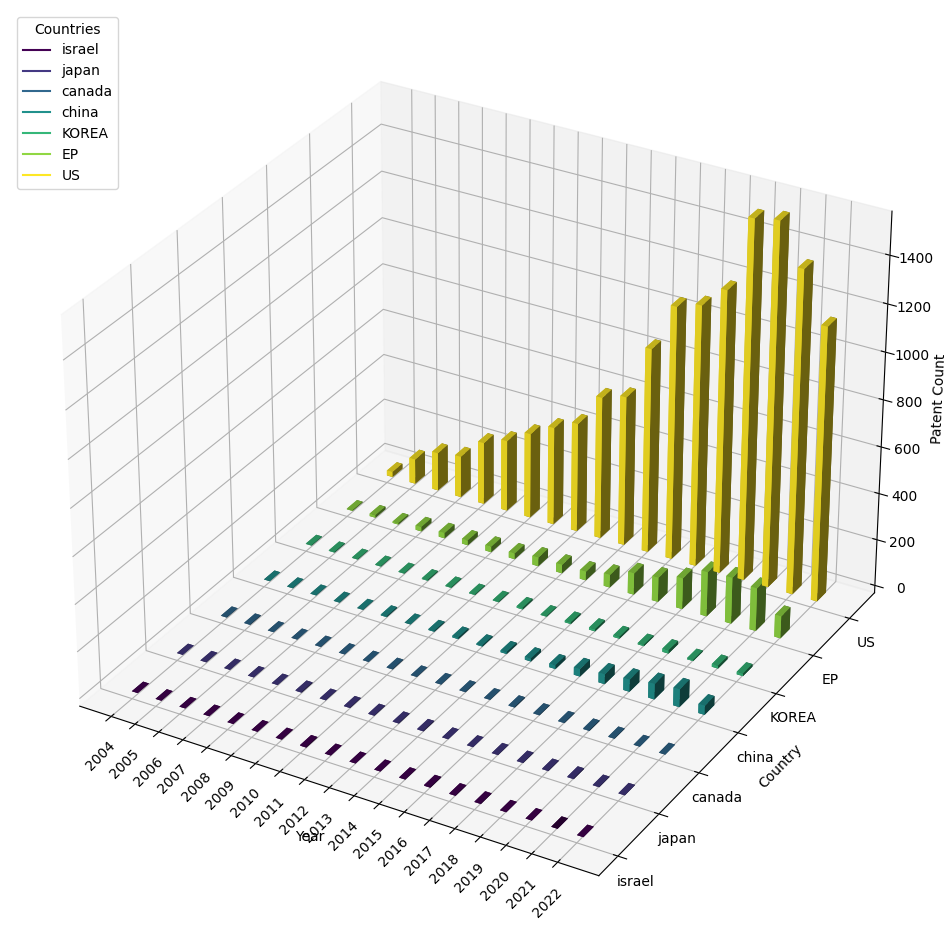

In [9]:

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


df = pd.read_csv('patent_data.csv')


fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')


years = df.columns.astype(int)
countries = df.index


x_pos = np.arange(len(years))
y_pos = np.arange(len(countries))
x_pos, y_pos = np.meshgrid(x_pos, y_pos)
x_pos = x_pos.ravel()
y_pos = y_pos.ravel()
z_pos = np.zeros_like(x_pos)


values = df.values.ravel()


colors = plt.cm.viridis(np.linspace(0, 1, len(countries)))

for i in range(len(countries)):
    start_idx = i * len(years)
    end_idx = (i + 1) * len(years)
    ax1.bar3d(x_pos[start_idx:end_idx], y_pos[start_idx:end_idx], z_pos[start_idx:end_idx],
              dx=0.25, dy=0.25, dz=values[start_idx:end_idx], color=colors[i], label=countries[i])



ax1.set_xticks(np.arange(len(years)))
ax1.set_xticklabels(years, rotation=45)
ax1.set_yticks(np.arange(len(countries)))
ax1.set_yticklabels(countries)


ax1.set_xlabel('Year')
ax1.set_ylabel('Country')
ax1.set_zlabel('Patent Count')


custom_legend = [plt.Line2D([0], [0], linestyle='-', color=colors[i], label=countries[i]) for i in range(len(countries))]
ax1.legend(handles=custom_legend, title='Countries', loc='upper left')

plt.show()